In [1]:
#importing various libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Train_data = pd.read_csv('train.csv',header='infer',na_values='*')

In [3]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   session_id               40000 non-null  int64  
 1   administrative           40000 non-null  int64  
 2   administrative_duration  40000 non-null  float64
 3   informational            40000 non-null  int64  
 4   informational_duration   40000 non-null  float64
 5   productrelated           40000 non-null  int64  
 6   productrelated_duration  40000 non-null  float64
 7   bouncerates              40000 non-null  float64
 8   exitrates                40000 non-null  float64
 9   pagevalues               40000 non-null  float64
 10  specialday               40000 non-null  float64
 11  month                    40000 non-null  object 
 12  operatingsystems         39915 non-null  float64
 13  browser                  39950 non-null  float64
 14  region                

In [4]:
Train_data.isna().sum()

session_id                   0
administrative               0
administrative_duration      0
informational                0
informational_duration       0
productrelated               0
productrelated_duration      0
bouncerates                  0
exitrates                    0
pagevalues                   0
specialday                   0
month                        0
operatingsystems            85
browser                     50
region                       0
traffictype                120
visitortype                  0
weekend                      0
revenue                      0
dtype: int64

In [5]:
Train_data['operatingsystems'] = Train_data['operatingsystems'].fillna(Train_data['operatingsystems'].mode()[0])
Train_data['browser'] = Train_data['browser'].fillna(Train_data['browser'].mode()[0])
Train_data['traffictype'] = Train_data['traffictype'].fillna(Train_data['traffictype'].mode()[0])
Train_data.drop('session_id',axis=1,inplace=True)

In [6]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           40000 non-null  int64  
 1   administrative_duration  40000 non-null  float64
 2   informational            40000 non-null  int64  
 3   informational_duration   40000 non-null  float64
 4   productrelated           40000 non-null  int64  
 5   productrelated_duration  40000 non-null  float64
 6   bouncerates              40000 non-null  float64
 7   exitrates                40000 non-null  float64
 8   pagevalues               40000 non-null  float64
 9   specialday               40000 non-null  float64
 10  month                    40000 non-null  object 
 11  operatingsystems         40000 non-null  float64
 12  browser                  40000 non-null  float64
 13  region                   40000 non-null  int64  
 14  traffictype           

In [7]:
Train_data.describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype,revenue
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,2.544150,89.794383,0.555225,40.977236,34.026975,1148.105672,0.021969,0.042307,6.494963,0.063553,2.118675,2.398025,3.241975,4.156725,0.158275
std,3.667252,182.964645,1.332627,153.114387,46.798102,1666.181462,0.048533,0.048633,17.710646,0.199463,0.872760,1.706026,2.423586,3.990672,0.365003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.883333,0.000000,0.013389,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,11.200000,0.000000,0.000000,19.000000,560.075000,0.003304,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,3.000000,0.000000
75%,4.000000,110.154167,0.000000,0.000000,41.000000,1420.536667,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,22.000000,1946.000000,11.000000,1767.666667,440.000000,18504.126210,0.200000,0.200000,226.677702,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [8]:
Train_data.describe(include='object')

,month,visitortype
count,40000,40000
unique,10,3
top,May,Returning_Visitor
freq,11048,34496


In [9]:
Train_data['revenue'].value_counts() / Train_data.shape[0] * 100 

0    84.1725
1    15.8275
Name: revenue, dtype: float64

In [10]:
# imbalance data

In [11]:
Train_numerical = pd.get_dummies(Train_data, drop_first=True)

In [12]:
Train_numerical

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,...,month_Feb,month_Jul,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,visitortype_Other,visitortype_Returning_Visitor
0,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,...,0,0,0,0,0,1,0,0,0,1
3,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,...,0,0,0,0,0,1,0,0,0,1
4,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,14,271.232434,1,4.0,12,270.233333,0.000000,0.007692,33.258525,0.0,...,0,0,0,0,0,0,1,0,0,0
39996,14,123.930000,5,38.6,160,6190.526028,0.000000,0.040557,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,1
39997,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
39998,0,0.000000,0,0.0,36,1193.625000,0.034617,0.069524,0.000000,0.2,...,0,0,0,0,1,0,0,0,0,1


Train_numerical_new = Train_numerical[['pagevalues','productrelated_duration','exitrates'
                                   ,'productrelated','administrative_duration','bouncerates',
                                   'administrative','region','traffictype','informational_duration',
                                   'browser','month_Nov','informational','operatingsystems','visitortype_Returning_Visitor','revenue']]

In [13]:
target_col = 'revenue'
input_cols = Train_numerical.drop(target_col, axis=1).columns
train_x, test_x, train_y, test_y = train_test_split(Train_numerical[input_cols],
                                                    Train_numerical[target_col],
                                                    test_size=0.1,
                                                    random_state=1)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((36000, 26), (4000, 26), (36000,), (4000,))

In [14]:
scaler = StandardScaler().fit(train_x)
train_x_scaled = pd.DataFrame(scaler.transform(train_x),
                              columns=train_x.columns,
                              index=train_x.index)
test_x_scaled = pd.DataFrame(scaler.transform(test_x),
                              columns=test_x.columns,
                              index=test_x.index)

In [15]:
def get_model_metrics(actual, predicted, classifier_name):
  acc = accuracy_score(actual, predicted)
  f1 = f1_score(actual, predicted)
  tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
  sensitivity = tp / (tp + fn)
  specificity = tn / (tn + fp)
  fpr, tpr, thresholds = roc_curve(actual, predicted, pos_label=1)
  auc_value = auc(fpr, tpr)
  return {'accuracy': acc,
          'f1-score': f1,
          'classifier': classifier_name,
          'sensitivity': sensitivity,
          'specificity': specificity,
          'AUC': auc_value,
          'fpr_values': fpr,
          'tpr_values': tpr}

In [16]:
res_cols = ['classifier', 'f1-score', 'sensitivity', 'specificity', 'AUC', 'accuracy']
df_results = pd.DataFrame(columns=res_cols)

In [17]:
# Logistic regression
classifier_name = 'Logistic Regression'
model = LogisticRegression().fit(train_x_scaled, train_y)
test_y_pred = model.predict(test_x_scaled)
lg_metrics = get_model_metrics(test_y, test_y_pred, classifier_name)
print(lg_metrics)
if classifier_name not in df_results['classifier'].values:
    df_results = df_results.append(lg_metrics, ignore_index=True)

{'accuracy': 0.871, 'f1-score': 0.4556962025316456, 'classifier': 'Logistic Regression', 'sensitivity': 0.33384853168469864, 'specificity': 0.9746495675514465, 'AUC': 0.6542490496180726, 'fpr_values': array([0.        , 0.02535043, 1.        ]), 'tpr_values': array([0.        , 0.33384853, 1.        ])}


In [18]:
# Decision Trees
classifier_name = 'Decision Tree'
model = DecisionTreeClassifier(max_depth=8, random_state=1).fit(train_x_scaled, train_y)
test_y_pred = model.predict(test_x_scaled)
dt_metrics = get_model_metrics(test_y, test_y_pred, classifier_name)
print(dt_metrics)
if classifier_name not in df_results['classifier'].values:
    df_results = df_results.append(dt_metrics, ignore_index=True)

{'accuracy': 0.9015, 'f1-score': 0.6573913043478262, 'classifier': 'Decision Tree', 'sensitivity': 0.5842349304482226, 'specificity': 0.962719952281539, 'AUC': 0.7734774413648807, 'fpr_values': array([0.        , 0.03728005, 1.        ]), 'tpr_values': array([0.        , 0.58423493, 1.        ])}


In [19]:
# KNN
classifier_name = 'KNN'
model = KNeighborsClassifier(n_neighbors=5).fit(train_x_scaled, train_y)
test_y_pred = model.predict(test_x_scaled)
knn_metrics = get_model_metrics(test_y, test_y_pred, classifier_name)
print(knn_metrics)
if classifier_name not in df_results['classifier'].values:
    df_results = df_results.append(knn_metrics, ignore_index=True)

{'accuracy': 0.87375, 'f1-score': 0.5139557266602502, 'classifier': 'KNN', 'sensitivity': 0.4126738794435858, 'specificity': 0.962719952281539, 'AUC': 0.6876969158625624, 'fpr_values': array([0.        , 0.03728005, 1.        ]), 'tpr_values': array([0.        , 0.41267388, 1.        ])}


# SVM
classifier_name = 'SVM'
model = SVC().fit(train_x_scaled, train_y)
test_y_pred = model.predict(test_x_scaled)
svm_metrics = get_model_metrics(test_y, test_y_pred, classifier_name)
print(svm_metrics)
if classifier_name not in df_results['classifier'].values:
    df_results = df_results.append(svm_metrics, ignore_index=True)

In [20]:
#Random Forest
classifier_name = 'Random Forest'
model = RandomForestClassifier(n_estimators=500, random_state=0).fit(train_x_scaled, train_y)
test_y_pred = model.predict(test_x_scaled)
rfc_metrics = get_model_metrics(test_y, test_y_pred, classifier_name)
print(rfc_metrics)
if classifier_name not in df_results['classifier'].values:
    df_results = df_results.append(rfc_metrics, ignore_index=True)

{'accuracy': 0.9045, 'f1-score': 0.6816666666666666, 'classifier': 'Random Forest', 'sensitivity': 0.6321483771251932, 'specificity': 0.9570533850283328, 'AUC': 0.7946008810767631, 'fpr_values': array([0.        , 0.04294661, 1.        ]), 'tpr_values': array([0.        , 0.63214838, 1.        ])}


In [21]:
df_results.drop(['fpr_values', 'tpr_values'], axis=1)

,classifier,f1-score,sensitivity,specificity,AUC,accuracy
0,Logistic Regression,0.455696,0.333849,0.974650,0.654249,0.87100
1,Decision Tree,0.657391,0.584235,0.962720,0.773477,0.90150
2,KNN,0.513956,0.412674,0.962720,0.687697,0.87375
3,Random Forest,0.681667,0.632148,0.957053,0.794601,0.90450


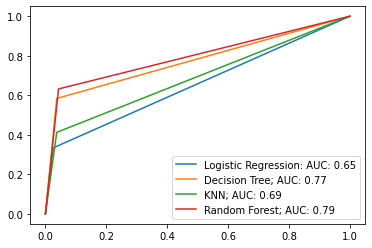

In [22]:
plt.plot(lg_metrics['fpr_values'], lg_metrics['tpr_values'])
plt.plot(dt_metrics['fpr_values'], dt_metrics['tpr_values'])
plt.plot(knn_metrics['fpr_values'], knn_metrics['tpr_values'])
#plt.plot(svm_metrics['fpr_values'], svm_metrics['tpr_values'])
plt.plot(rfc_metrics['fpr_values'], rfc_metrics['tpr_values'])
plt.legend(['Logistic Regression: AUC: %.2f' % lg_metrics['AUC'],
            'Decision Tree; AUC: %.2f' % dt_metrics['AUC'],
            'KNN; AUC: %.2f' % knn_metrics['AUC'],
           'Random Forest; AUC: %.2f' % rfc_metrics['AUC']])

#'SVM; AUC: %.2f' % svm_metrics['AUC']

In [23]:
#Random Forest
classifier_name = 'Random Forest'
rfc = RandomForestClassifier(n_estimators=500, random_state=0).fit(train_x_scaled, train_y)
test_y_pred = rfc.predict(test_x_scaled)
rfc_metrics = get_model_metrics(test_y, test_y_pred, classifier_name)
print(rfc_metrics)

{'accuracy': 0.9045, 'f1-score': 0.6816666666666666, 'classifier': 'Random Forest', 'sensitivity': 0.6321483771251932, 'specificity': 0.9570533850283328, 'AUC': 0.7946008810767631, 'fpr_values': array([0.        , 0.04294661, 1.        ]), 'tpr_values': array([0.        , 0.63214838, 1.        ])}


In [24]:
pd.Series(rfc.feature_importances_ ,index = test_x_scaled.columns).sort_values(ascending=False).head(20)

pagevalues                       0.403332
productrelated_duration          0.079532
exitrates                        0.078431
productrelated                   0.070495
administrative_duration          0.057849
bouncerates                      0.056735
administrative                   0.039833
region                           0.029690
traffictype                      0.028557
informational_duration           0.027843
browser                          0.018771
month_Nov                        0.018505
informational                    0.017613
operatingsystems                 0.016984
visitortype_Returning_Visitor    0.013087
weekend                          0.009160
month_May                        0.006636
month_Dec                        0.005184
month_Mar                        0.005080
specialday                       0.004022
dtype: float64

In [25]:
Test_data = pd.read_csv('test.csv',header='infer',na_values='*')

In [26]:
Test_data.isna().sum()

session_id                  0
administrative              0
administrative_duration     0
informational               0
informational_duration      0
productrelated              0
productrelated_duration     0
bouncerates                 0
exitrates                   0
pagevalues                  0
specialday                  0
month                       0
operatingsystems           24
browser                    14
region                      0
traffictype                39
visitortype                 0
weekend                     0
dtype: int64

In [27]:
Test_data['operatingsystems'] = Test_data['operatingsystems'].fillna(Test_data['operatingsystems'].mode()[0])
Test_data['browser'] = Test_data['browser'].fillna(Test_data['browser'].mode()[0])
Test_data['traffictype'] = Test_data['traffictype'].fillna(Test_data['traffictype'].mode()[0])

In [28]:
Test_df = Test_data.drop('session_id',axis=1)

In [29]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           10000 non-null  int64  
 1   administrative_duration  10000 non-null  float64
 2   informational            10000 non-null  int64  
 3   informational_duration   10000 non-null  float64
 4   productrelated           10000 non-null  int64  
 5   productrelated_duration  10000 non-null  float64
 6   bouncerates              10000 non-null  float64
 7   exitrates                10000 non-null  float64
 8   pagevalues               10000 non-null  float64
 9   specialday               10000 non-null  float64
 10  month                    10000 non-null  object 
 11  operatingsystems         10000 non-null  float64
 12  browser                  10000 non-null  float64
 13  region                   10000 non-null  int64  
 14  traffictype            

In [30]:
Test_numerical = pd.get_dummies(Test_df, drop_first=True)

In [31]:
Test_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   administrative                 10000 non-null  int64  
 1   administrative_duration        10000 non-null  float64
 2   informational                  10000 non-null  int64  
 3   informational_duration         10000 non-null  float64
 4   productrelated                 10000 non-null  int64  
 5   productrelated_duration        10000 non-null  float64
 6   bouncerates                    10000 non-null  float64
 7   exitrates                      10000 non-null  float64
 8   pagevalues                     10000 non-null  float64
 9   specialday                     10000 non-null  float64
 10  operatingsystems               10000 non-null  float64
 11  browser                        10000 non-null  float64
 12  region                         10000 non-null  

In [32]:
scaler = StandardScaler().fit(Test_numerical)
test_final_scaled = pd.DataFrame(scaler.transform(Test_numerical),
                              columns=Test_numerical.columns,
                              index=Test_numerical.index)

In [33]:
test_final_scaled

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,...,month_Feb,month_Jul,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,visitortype_Other,visitortype_Returning_Visitor
0,-0.695771,-0.501918,-0.426569,-0.274793,-0.505145,-0.455159,-0.449666,-0.575206,-0.366016,-0.307989,...,-0.13462,-0.190727,-0.145746,-0.424030,-0.605387,1.733900,-0.20834,-0.194358,-0.074367,-2.555410
1,-0.695771,-0.501918,-0.426569,-0.274793,-0.362334,-0.600832,-0.079732,0.054200,-0.366016,-0.307989,...,-0.13462,-0.190727,-0.145746,-0.424030,-0.605387,1.733900,-0.20834,-0.194358,-0.074367,-2.555410
2,-0.695771,-0.501918,-0.426569,-0.274793,0.249710,0.313383,-0.020217,-0.324554,-0.366016,-0.307989,...,-0.13462,-0.190727,-0.145746,2.358321,-0.605387,-0.576734,-0.20834,-0.194358,-0.074367,0.391327
3,-0.695771,-0.501918,0.319442,5.698170,-0.035911,-0.362966,-0.449666,-0.545590,-0.366016,-0.307989,...,-0.13462,-0.190727,-0.145746,-0.424030,-0.605387,1.733900,-0.20834,-0.194358,-0.074367,0.391327
4,-0.695771,-0.501918,1.065452,-0.162470,-0.627554,-0.685294,3.728630,3.277747,-0.366016,-0.307989,...,-0.13462,-0.190727,-0.145746,2.358321,-0.605387,-0.576734,-0.20834,-0.194358,-0.074367,0.391327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.227007,0.496188,2.557472,0.081999,2.575479,1.537205,-0.421643,-0.368029,0.472248,-0.307989,...,-0.13462,-0.190727,-0.145746,-0.424030,-0.605387,1.733900,-0.20834,-0.194358,-0.074367,0.391327
9996,-0.695771,-0.501918,-0.426569,-0.274793,-0.566349,-0.210195,-0.449666,-0.410550,-0.366016,-0.307989,...,-0.13462,-0.190727,-0.145746,-0.424030,-0.605387,-0.576734,-0.20834,-0.194358,-0.074367,-2.555410
9997,-0.695771,-0.501918,-0.426569,-0.274793,-0.545948,-0.564591,-0.449666,-0.041720,-0.366016,-0.307989,...,-0.13462,-0.190727,-0.145746,-0.424030,-0.605387,1.733900,-0.20834,-0.194358,-0.074367,0.391327
9998,-0.695771,-0.501918,-0.426569,-0.274793,-0.525546,-0.565185,-0.449666,-0.715791,-0.366016,-0.307989,...,-0.13462,-0.190727,-0.145746,2.358321,-0.605387,-0.576734,-0.20834,-0.194358,-0.074367,-2.555410


In [34]:
final_pred = rfc.predict(test_final_scaled)

In [35]:
final_pred.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [36]:
final_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
## Storeing the output in to the csv file
Session_id = pd.DataFrame(Test_data['session_id'])
Predicted = pd.DataFrame(final_pred.reshape(-1,1))


In [38]:
Session_id.shape

(10000, 1)

In [39]:
Predicted.shape

(10000, 1)

In [40]:
Predicted.reset_index()
Session_id.reset_index()
Predictdata= pd.merge(Session_id,Predicted,how = 'inner',left_index = True, right_index = True)


In [41]:
Predictdata

,session_id,0
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0
...,...,...
9995,278347,1
9996,498240,0
9997,296710,0
9998,226309,0


In [42]:
Predictdata.to_csv("Randomforest_Output_cv2.csv")

In [43]:
#Random Forest
classifier_name = 'Random Forest'
rfc = RandomForestClassifier(n_estimators=500, random_state=0).fit(train_x_scaled, train_y)
test_y_pred = rfc.predict(test_x_scaled)
rfc_metrics = get_model_metrics(test_y, test_y_pred, classifier_name)
print(rfc_metrics)

from sklearn.model_selection import GridSearchCV

parameters=[{'n_estimators':[100,200,300,400,500], 'max_depth':  
             [5,10,15,20,25]}]
         
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=parameters,
                           cv=10,
                           n_jobs=-1,
                           scoring=('f1'))
                           
grid = grid_search.fit(X,y)
grid.best_score_

{'accuracy': 0.9045, 'f1-score': 0.6816666666666666, 'classifier': 'Random Forest', 'sensitivity': 0.6321483771251932, 'specificity': 0.9570533850283328, 'AUC': 0.7946008810767631, 'fpr_values': array([0.        , 0.04294661, 1.        ]), 'tpr_values': array([0.        , 0.63214838, 1.        ])}


NameError: name 'regr' is not defined